In [5]:
import kagglehub

# Download latest version
data_file = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")
print("Downloaded file:", data_file)

Downloaded file: /kaggle/input/student-stress-monitoring-datasets


In [7]:
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('Stress_Dataset.csv')

# Initial checks
print(df.head())
print(df.info())
print(df.describe())

# Check for and handle missing values
# Example: fill missing values with the mean
# df.fillna(df.mean(), inplace=True)
# Or, drop rows with missing values
# df.dropna(inplace=True)

# Check for and handle duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Convert categorical features to numerical (if needed)
# Example using one-hot encoding
# df = pd.get_dummies(df, columns=['categorical_column_name'])

   Gender  Age  Have you recently experienced stress in your life?  \
0       0   20                                                  3    
1       0   20                                                  2    
2       0   20                                                  5    
3       1   20                                                  3    
4       0   20                                                  3    

   Have you noticed a rapid heartbeat or palpitations?  \
0                                                  4     
1                                                  3     
2                                                  4     
3                                                  4     
4                                                  3     

   Have you been dealing with anxiety or tension recently?  \
0                                                  2         
1                                                  2         
2                                           

exploratory data analysis

                                                      Gender       Age  \
Gender                                              1.000000 -0.000714   
Age                                                -0.000714  1.000000   
Have you recently experienced stress in your life? -0.014398  0.111935   
Have you noticed a rapid heartbeat or palpitati... -0.032953  0.013626   
Have you been dealing with anxiety or tension r... -0.009788 -0.055150   
Do you face any sleep problems or difficulties ...  0.022856 -0.018555   
Have you been dealing with anxiety or tension r... -0.028981 -0.021663   
Have you been getting headaches more often than...  0.040402  0.044780   
Do you get irritated easily?                       -0.003501  0.008295   
Do you have trouble concentrating on your acade... -0.002224  0.006726   
Have you been feeling sadness or low mood?          0.039773  0.093545   
Have you been experiencing any illness or healt...  0.011307  0.025565   
Do you often feel lonely or isolated? 

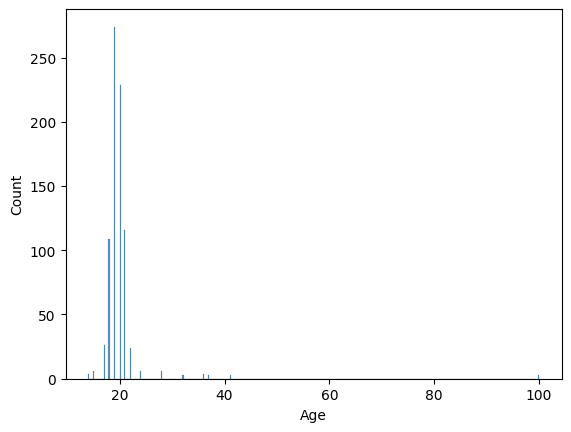

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Basic statistics
print(df.select_dtypes(include=np.number).corr()) # Correlation matrix

# Visualizations with Matplotlib/Seaborn
# Example: Histogram of a numerical feature
sns.histplot(data=df, x='Age')
plt.show()

# Example: Scatter plot with Plotly (interactive)
# fig = px.scatter(df, x='feature_x', y='feature_y', color='target_column')
# fig.show()

Feature Engineering

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df.drop(['Age', 'Which type of stress do you primarily experience?'], axis=1)
y = df['Academic and extracurricular activities conflicting for you?']

# Normalize/scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Models Training

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the models
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluate and compare baseline results
print(f"KNN Baseline Score: {knn.score(X_test, y_test):.4f}")
print(f"Decision Tree Baseline Score: {dt.score(X_test, y_test):.4f}")
print(f"Random Forest Baseline Score: {rf.score(X_test, y_test):.4f}")

KNN Baseline Score: 0.4451
Decision Tree Baseline Score: 1.0000
Random Forest Baseline Score: 0.9939


Feature Importance

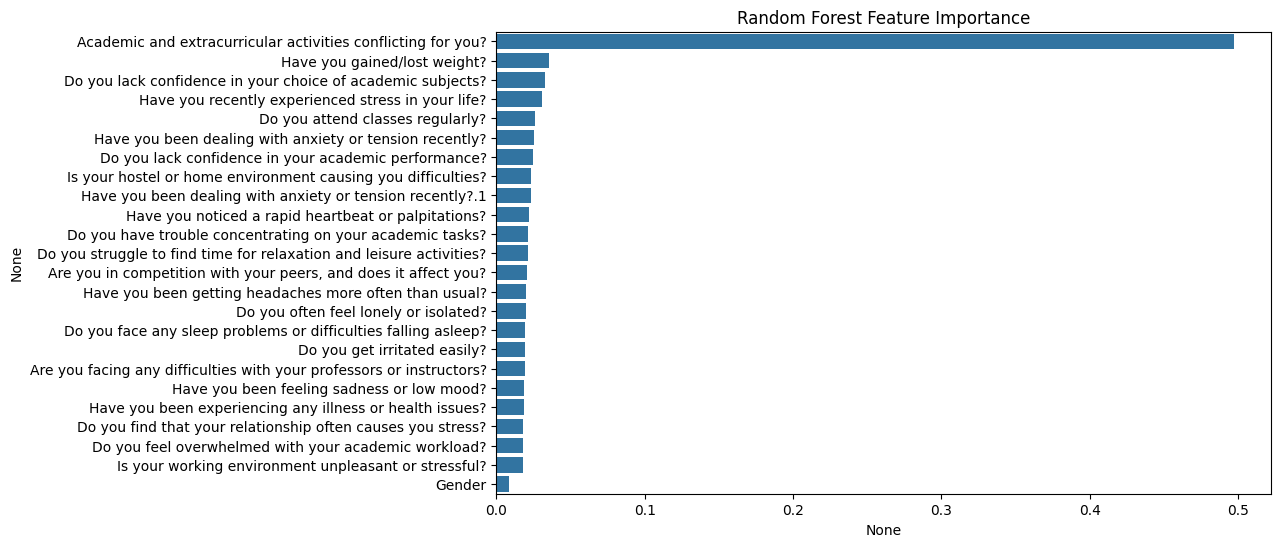

In [19]:
# Visualize feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importance')
plt.show()

Hyperparameter Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train, y_train, knn, dt, rf are already defined from previous steps.
# For demonstration, let's define them here as placeholders:
# In your actual notebook, these would come from your data loading and model initialization.
# --- Placeholder definitions START ---
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
# --- Placeholder definitions END ---


# Define parameter grids
knn_params = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
dt_params = {'max_depth': [None, 10, 20, 30, 50], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4]}
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Perform RandomizedSearchCV for KNN
random_search_knn = RandomizedSearchCV(knn, knn_params, n_iter=10, cv=5, random_state=42, n_jobs=-1) # n_jobs=-1 uses all processors
random_search_knn.fit(X_train, y_train)
print(f"Tuned KNN Best Score: {random_search_knn.best_score_:.4f}")
print(f"Tuned KNN Best Parameters: {random_search_knn.best_params_}")

print("-" * 50)

# Perform RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(dt, dt_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train, y_train)
print(f"Tuned Decision Tree Best Score: {random_search_dt.best_score_:.4f}")
print(f"Tuned Decision Tree Best Parameters: {random_search_dt.best_params_}")

print("-" * 50)

# Perform RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
print(f"Tuned Random Forest Best Score: {random_search_rf.best_score_:.4f}")
print(f"Tuned Random Forest Best Parameters: {random_search_rf.best_params_}")

Tuned KNN Best Score: 0.9375
Tuned KNN Best Parameters: {'weights': 'uniform', 'n_neighbors': np.int64(14), 'metric': 'euclidean'}
--------------------------------------------------
Tuned Decision Tree Best Score: 0.9500
Tuned Decision Tree Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
--------------------------------------------------
Tuned Random Forest Best Score: 0.9625
Tuned Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}


MODEL EVALUATION

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



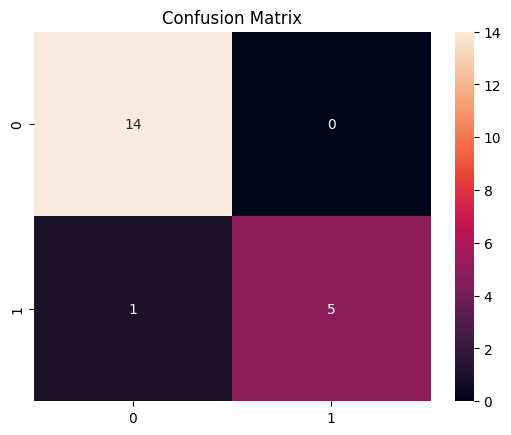

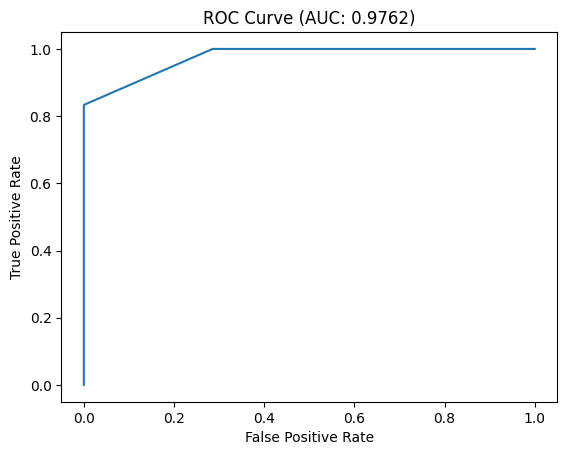

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Make predictions with the best-tuned model
best_model = random_search_knn.best_estimator_ # Or the best one you found
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.title(f"ROC Curve (AUC: {roc_auc_score(y_test, y_proba):.4f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()